In [10]:
pip install cartopy # need for plotting coastlines

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
#import modules
import xarray as xr
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.util as cutil
import warnings
from matplotlib.figure import Axes
from matplotlib.figure import Figure
import xesmf as xe
# import cmcrameri
# from cmcrameri import cm
# www.fabiocrameri.ch/colourmaps/

In [154]:
# need for plotting coastlines
pi_land = xr.open_dataset("/glade/derecho/scratch/juliacam/archive/PI_BGC_test02/atm/hist/PI_BGC_test02.cam.h0.0001-02.nc")

In [155]:
# import precipitation and surface temperature data for all 4 scenarios at first and second half of century
ssp126_prfirst = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp126/r10i1p1f1/Amon/pr/gn/files/d20200528/pr_Amon_CESM2_ssp126_r10i1p1f1_gn_201501-206412.nc")
ssp126_prsecond = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp126/r10i1p1f1/Amon/pr/gn/files/d20200528/pr_Amon_CESM2_ssp126_r10i1p1f1_gn_206501-210012.nc")
ssp126_tsfirst = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp126/r10i1p1f1/Amon/ts/gn/files/d20200528/ts_Amon_CESM2_ssp126_r10i1p1f1_gn_201501-206412.nc")
ssp126_tssecond = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp126/r10i1p1f1/Amon/ts/gn/files/d20200528/ts_Amon_CESM2_ssp126_r10i1p1f1_gn_206501-210012.nc")
ssp245_prfirst = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp245/r10i1p1f1/Amon/pr/gn/files/d20200528/pr_Amon_CESM2_ssp245_r10i1p1f1_gn_201501-206412.nc")
ssp245_prsecond = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp245/r10i1p1f1/Amon/pr/gn/files/d20200528/pr_Amon_CESM2_ssp245_r10i1p1f1_gn_206501-210012.nc")
ssp245_tsfirst = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp245/r10i1p1f1/Amon/ts/gn/files/d20200528/ts_Amon_CESM2_ssp245_r10i1p1f1_gn_201501-206412.nc")
ssp245_tssecond = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp245/r10i1p1f1/Amon/ts/gn/files/d20200528/ts_Amon_CESM2_ssp245_r10i1p1f1_gn_206501-210012.nc")
ssp370_prfirst = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp370/r10i1p1f1/Amon/pr/gn/files/d20200528/pr_Amon_CESM2_ssp370_r10i1p1f1_gn_201501-206412.nc")
ssp370_prsecond = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp370/r10i1p1f1/Amon/pr/gn/files/d20200528/pr_Amon_CESM2_ssp370_r10i1p1f1_gn_206501-210012.nc")
ssp370_tsfirst = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp370/r10i1p1f1/Amon/ts/gn/files/d20200528/ts_Amon_CESM2_ssp370_r10i1p1f1_gn_201501-206412.nc")
ssp370_tssecond = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp370/r10i1p1f1/Amon/ts/gn/files/d20200528/ts_Amon_CESM2_ssp370_r10i1p1f1_gn_206501-210012.nc")
ssp585_prfirst = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585/r10i1p1f1/Amon/pr/gn/files/d20200528/pr_Amon_CESM2_ssp585_r10i1p1f1_gn_201501-206412.nc")
ssp585_prsecond = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585/r10i1p1f1/Amon/pr/gn/files/d20200528/pr_Amon_CESM2_ssp585_r10i1p1f1_gn_206501-210012.nc")
ssp585_tsfirst = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585/r10i1p1f1/Amon/ts/gn/files/d20200528/ts_Amon_CESM2_ssp585_r10i1p1f1_gn_201501-206412.nc")
ssp585_tssecond = xr.open_dataset("/glade/campaign/collections/cdg/data/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585/r10i1p1f1/Amon/ts/gn/files/d20200528/ts_Amon_CESM2_ssp585_r10i1p1f1_gn_206501-210012.nc")

/glade/u/home/juliacam/.local/lib/python3.9/site-packages/xarray/conventions.py:544: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/juliacam/.local/lib/python3.9/site-packages/xarray/conventions.py:544: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/juliacam/.local/lib/python3.9/site-packages/xarray/conventions.py:544: SerializationWarning: variable 'ts' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/juliacam/.local/lib/python3.9/site-packages/xarray/conventions.py:544: SerializationWarning: variable 'ts' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/juliacam/.local/lib/python3.9/site-packages/xarray/conventions.py:544: Serializati

In [156]:
# get mean annual precipitation values
pr126_1 = ssp126_prfirst.pr.mean(dim='time')
prmm126_1 = pr126_1*86400 # mm/day
pr126_2 = ssp126_prsecond.pr.mean(dim='time')
prmm126_2 = pr126_2*86400 # mm/day
pr245_1 = ssp245_prfirst.pr.mean(dim='time')
prmm245_1 = pr245_1*86400 # mm/day
pr245_2 = ssp245_prsecond.pr.mean(dim='time')
prmm245_2 = pr245_2*86400 # mm/day
pr370_1 = ssp370_prfirst.pr.mean(dim='time')
prmm370_1 = pr370_1*86400 # mm/day
pr370_2 = ssp370_prsecond.pr.mean(dim='time')
prmm370_2 = pr370_2*86400 # mm/day
pr585_1 = ssp585_prfirst.pr.mean(dim='time')
prmm585_1 = pr585_1*86400 # mm/day
pr585_2 = ssp585_prsecond.pr.mean(dim='time')
prmm585_2 = pr585_2*86400 # mm/day

In [157]:
# get mean annual surface temperature values
ts126_1 = (ssp126_tsfirst.ts.mean(dim='time')) - 273.15
ts126_2 = (ssp126_tssecond.ts.mean(dim='time')) - 273.15
ts245_1 = (ssp245_tsfirst.ts.mean(dim='time')) - 273.15
ts245_2 = (ssp245_tssecond.ts.mean(dim='time')) - 273.15
ts370_1 = (ssp370_tsfirst.ts.mean(dim='time')) - 273.15
ts370_2 = (ssp370_tssecond.ts.mean(dim='time')) - 273.15
ts585_1 = (ssp585_tsfirst.ts.mean(dim='time')) - 273.15
ts585_2 = (ssp585_tssecond.ts.mean(dim='time')) - 273.15

In [158]:
# plot coastlines
def plot_land(ax: Axes, land_frac: xr.DataArray, threshold=0.5):
    """
    Plot the outline of grid cells that contain a land fraction greater than the
    provided threshold. Useful for plotting the paleo outline of continents.
    land_frac: A DataArray from CESM that contains the fraction of land at each
    given grid cell
    threshold: The fraction of land that needs to be in a grid cell to be considered
    in the outline
    """
    land = land_frac >= threshold
    ocean = land_frac < threshold
    cyclic_land, cyclic_land_lon = cutil.add_cyclic_point(land, coord=land.lon)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ax.contour(
            cyclic_land_lon,
            land.lat,
            cyclic_land,
            transform=ccrs.PlateCarree(),
            colors="black",
            levels=[1],
            linewidths=0.5,
        )

land = pi_land.LANDFRAC.isel(time=0)
land1 = land.sel(lat=slice(-40,27))
land2 = land1.sel(lon=slice(251,328))

In [159]:
# select lats and lons for zooming into Latin America
a126 = prmm126_2 - prmm126_1
b126 = a126.sel(lat=slice(-40,27))
c126 = b126.sel(lon=slice(251,330))

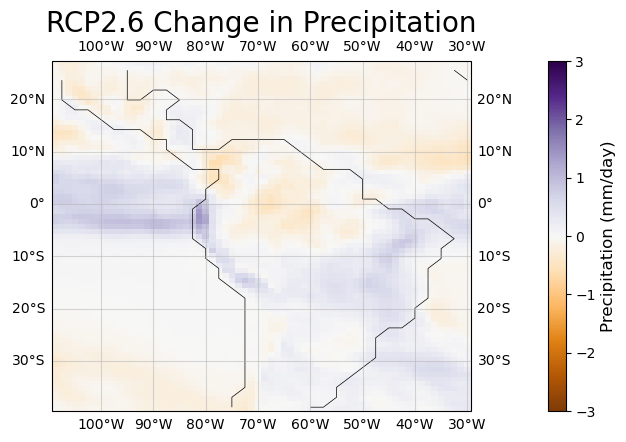

In [107]:
# plot precipitation
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land2)
data = ax.pcolormesh(c126.lon, c126.lat, c126, cmap='PuOr', vmin=-3, vmax=3)
cbar = plt.colorbar(data)
cbar.set_label("Precipitation (mm/day)", size=12)
ax.gridlines(alpha=0.5, draw_labels=True)
ax.set_title("RCP2.6 Change in Precipitation", size=20)
plt.show()
#fig.savefig("", dpi=300, bbox_inches='tight')

In [108]:
# select lats and lons for zooming into Latin America
a245 = prmm245_2 - prmm245_1
b245 = a245.sel(lat=slice(-40,27))
c245 = b245.sel(lon=slice(251,330))

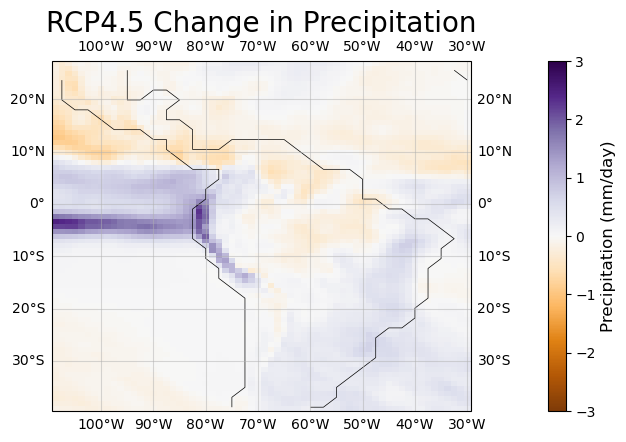

In [109]:
# plot precipitation
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land2)
data = ax.pcolormesh(c245.lon, c245.lat, c245, cmap='PuOr', vmin=-3, vmax=3)
cbar = plt.colorbar(data)
cbar.set_label("Precipitation (mm/day)", size=12)
ax.gridlines(alpha=0.5, draw_labels=True)
ax.set_title("RCP4.5 Change in Precipitation", size=20)
plt.show()
#fig.savefig("", dpi=300, bbox_inches='tight')

In [110]:
# select lats and lons for zooming into Latin America
a370 = prmm370_2 - prmm370_1
b370 = a370.sel(lat=slice(-40,27))
c370 = b370.sel(lon=slice(251,330))

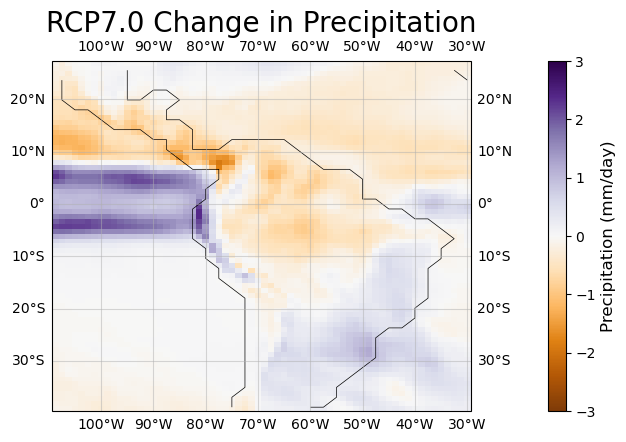

In [111]:
# plot precipitation
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land2)
data = ax.pcolormesh(c370.lon, c370.lat, c370, cmap='PuOr', vmin=-3, vmax=3)
cbar = plt.colorbar(data)
cbar.set_label("Precipitation (mm/day)", size=12)
ax.gridlines(alpha=0.5, draw_labels=True)
ax.set_title("RCP7.0 Change in Precipitation", size=20)
plt.show()
#fig.savefig("", dpi=300, bbox_inches='tight')

In [160]:
# select lats and lons for zooming into Latin America
a585 = prmm585_2 - prmm585_1
b585 = a585.sel(lat=slice(-40,27))
c585 = b585.sel(lon=slice(251,330))

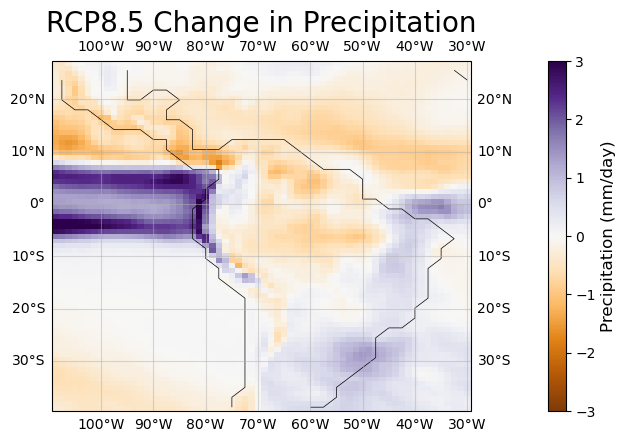

In [113]:
# plot precipitation
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land2)
data = ax.pcolormesh(c585.lon, c585.lat, c585, cmap='PuOr', vmin=-3, vmax=3)
cbar = plt.colorbar(data)
cbar.set_label("Precipitation (mm/day)", size=12)
ax.gridlines(alpha=0.5, draw_labels=True)
ax.set_title("RCP8.5 Change in Precipitation", size=20)
plt.show()
#fig.savefig("", dpi=300, bbox_inches='tight')

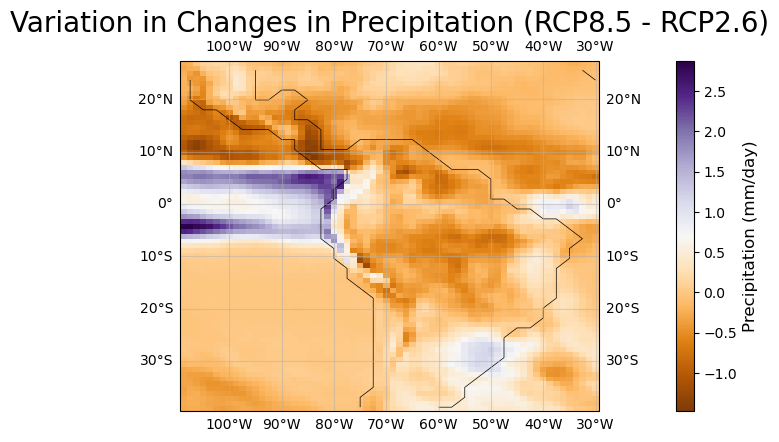

In [161]:
a585 = prmm585_2 - prmm585_1
b585 = a585.sel(lat=slice(-40,27))
c585 = b585.sel(lon=slice(251,330))
a126 = prmm126_2 - prmm126_1
b126 = a126.sel(lat=slice(-40,27))
c126 = b126.sel(lon=slice(251,330))
d = c585 - c126
# plot precipitation
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land2)
data = ax.pcolormesh(d.lon, d.lat, d, cmap='PuOr')
cbar = plt.colorbar(data)
cbar.set_label("Precipitation (mm/day)", size=12)
ax.gridlines(alpha=0.5, draw_labels=True)
ax.set_title("Variation in Changes in Precipitation (RCP8.5 - RCP2.6)", size=20)
plt.show()
#fig.savefig("", dpi=300, bbox_inches='tight')

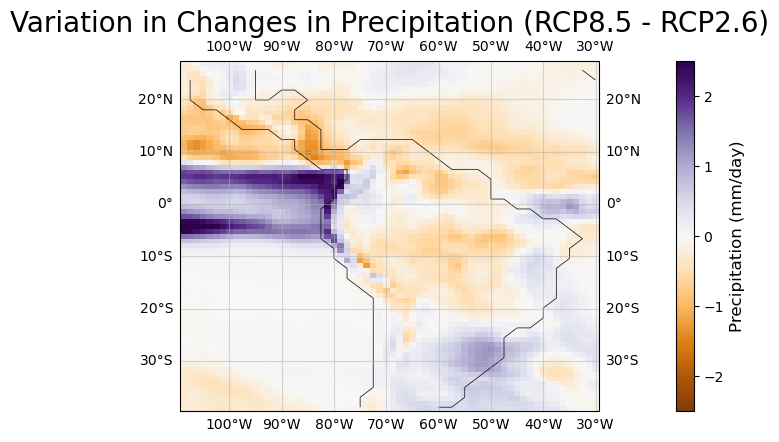

In [163]:
d = c585 - c126
# plot precipitation
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land2)
data = ax.pcolormesh(d.lon, d.lat, d, cmap='PuOr', vmin=-2.5, vmax=2.5)
cbar = plt.colorbar(data)
cbar.set_label("Precipitation (mm/day)", size=12)
ax.gridlines(alpha=0.5, draw_labels=True)
ax.set_title("Variation in Changes in Precipitation (RCP8.5 - RCP2.6)", size=20)
plt.show()
fig.savefig("PrecipVariation_LatinAmerica", dpi=300, bbox_inches='tight')

In [164]:
a126 = ts126_2 - ts126_1
b126 = a126.sel(lat=slice(-40,27))
c126 = b126.sel(lon=slice(251,330))

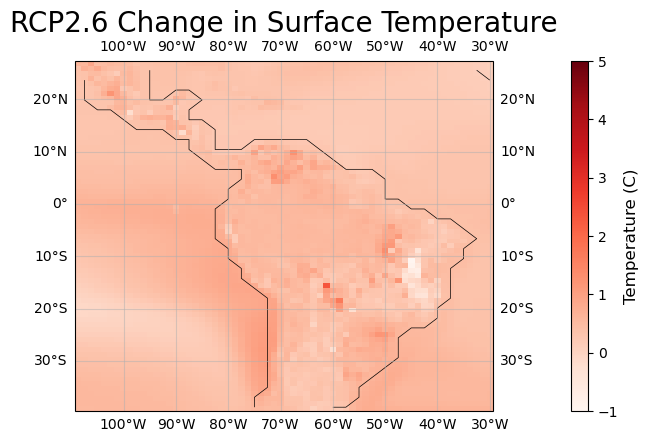

In [127]:
# plot temperature
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land2)
data = ax.pcolormesh(c126.lon, c126.lat, c126, cmap='Reds', vmin=-1, vmax=5)
cbar = plt.colorbar(data)
cbar.set_label("Temperature (C)", size=12)
ax.gridlines(alpha=0.5, draw_labels=True)
ax.set_title("RCP2.6 Change in Surface Temperature", size=20)
plt.show()
#fig.savefig("", dpi=300, bbox_inches='tight')

In [125]:
a245 = ts245_2 - ts245_1
b245 = a245.sel(lat=slice(-40,27))
c245 = b245.sel(lon=slice(251,330))

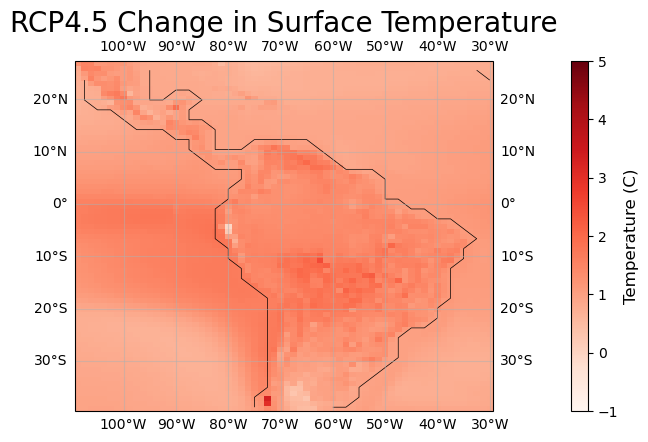

In [128]:
# plot temperature
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land2)
data = ax.pcolormesh(c245.lon, c245.lat, c245, cmap='Reds', vmin=-1, vmax=5)
cbar = plt.colorbar(data)
cbar.set_label("Temperature (C)", size=12)
ax.gridlines(alpha=0.5, draw_labels=True)
ax.set_title("RCP4.5 Change in Surface Temperature", size=20)
plt.show()
#fig.savefig("", dpi=300, bbox_inches='tight')

In [131]:
a370 = ts370_2 - ts370_1
b370 = a370.sel(lat=slice(-40,27))
c370 = b370.sel(lon=slice(251,330))

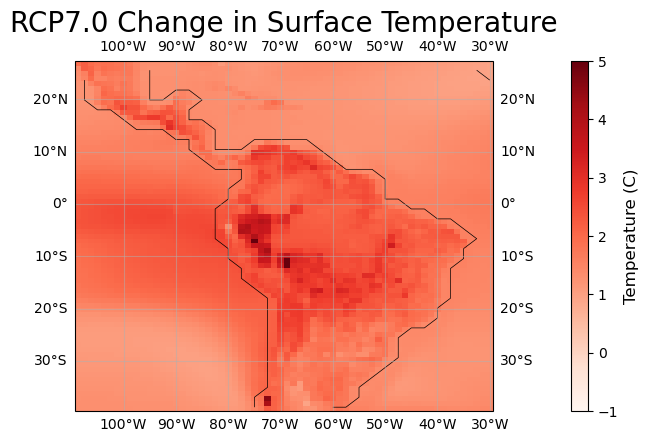

In [132]:
# plot temperature
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land2)
data = ax.pcolormesh(c370.lon, c370.lat, c370, cmap='Reds', vmin=-1, vmax=5)
cbar = plt.colorbar(data)
cbar.set_label("Temperature (C)", size=12)
ax.gridlines(alpha=0.5, draw_labels=True)
ax.set_title("RCP7.0 Change in Surface Temperature", size=20)
plt.show()
#fig.savefig("", dpi=300, bbox_inches='tight')

In [165]:
a585 = ts585_2 - ts585_1
b585 = a585.sel(lat=slice(-40,27))
c585 = b585.sel(lon=slice(251,330))

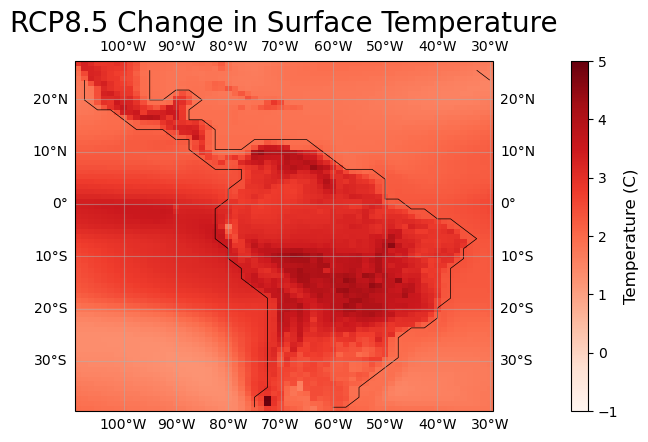

In [137]:
# plot temperature
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land2)
data = ax.pcolormesh(c585.lon, c585.lat, c585, cmap='Reds', vmin=-1, vmax=5)
cbar = plt.colorbar(data)
cbar.set_label("Temperature (C)", size=12)
ax.gridlines(alpha=0.5, draw_labels=True)
ax.set_title("RCP8.5 Change in Surface Temperature", size=20)
plt.show()
#fig.savefig("", dpi=300, bbox_inches='tight')

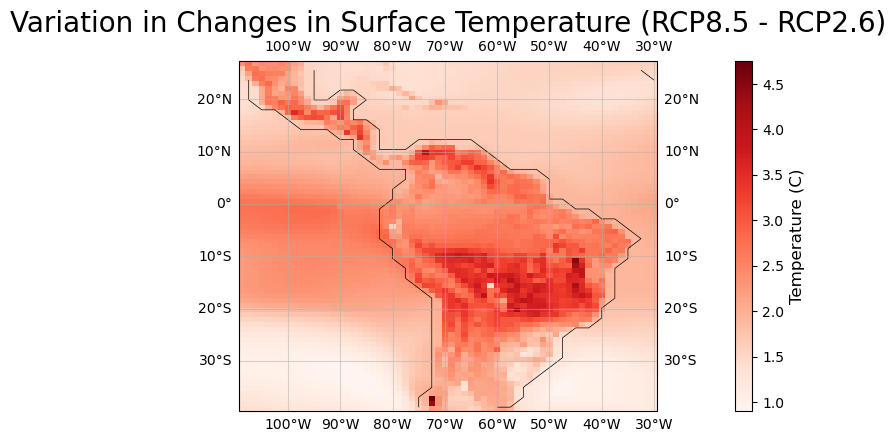

In [166]:
d = c585 - c126
# plot temperature
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
plot_land(ax,land2)
data = ax.pcolormesh(d.lon, d.lat, d, cmap='Reds')
cbar = plt.colorbar(data)
cbar.set_label("Temperature (C)", size=12)
ax.gridlines(alpha=0.5, draw_labels=True)
ax.set_title("Variation in Changes in Surface Temperature (RCP8.5 - RCP2.6)", size=20)
plt.show()
fig.savefig("TempVariation_LatinAmerica", dpi=300, bbox_inches='tight')